## Need to understand customers

1) Customer Segmentation

2) CRM metrics - Cohort Analysis

3) Predict Sales daily 

4) Recommendation

In [129]:
## https://www.kaggle.com/datasets/carrie1/ecommerce-data/code?datasetId=1985&sortBy=voteCount

In [4]:
#pip install --upgrade seaborn

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [6]:
df = pd.read_csv('data.csv', encoding='latin1')

In [7]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [8]:
df.shape

(541909, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
df[df['CustomerID']==17850.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
86898,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2/10/2011 14:38,4.95,17850.0,United Kingdom
86899,C543611,21874,GIN AND TONIC MUG,-1,2/10/2011 14:38,1.06,17850.0,United Kingdom
86900,C543611,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,-2,2/10/2011 14:38,2.75,17850.0,United Kingdom
86901,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2/10/2011 14:38,4.95,17850.0,United Kingdom


In [12]:
df[df['CustomerID']==17850.0]['InvoiceNo'].nunique()

35

In [13]:
df[df['CustomerID']==17850.0]['StockCode'].nunique()

24

In [14]:
df[df['CustomerID'].isna()].sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
11312,537240,84536A,ENGLISH ROSE NOTEBOOK A7 SIZE,1,12/6/2010 10:08,0.85,NaN,United Kingdom
210449,555278,22558,CLOTHES PEGS RETROSPOT PACK 24,1,6/1/2011 17:33,3.29,NaN,United Kingdom
228477,556932,23144,ZINC T-LIGHT HOLDER STARS SMALL,1,6/15/2011 15:41,1.63,NaN,United Kingdom


In [15]:
(df.isnull().sum()*100)/df.shape[0]

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

No. of unique countries


In [18]:
df['Country'].nunique()

37

In [19]:
df.groupby(['Country']).agg({'InvoiceNo':'count'}).reset_index().sort_values(by='InvoiceNo',ascending = False).rename(columns={'InvoiceNo':'No.of Transcations'})

,Country,No.of Transcations
35,United Kingdom,361878
14,Germany,9495
13,France,8491
10,EIRE,7485
30,Spain,2533
23,Netherlands,2371
3,Belgium,2069
32,Switzerland,1877
26,Portugal,1480
0,Australia,1259


<Axes: xlabel='Quantity', ylabel='Density'>

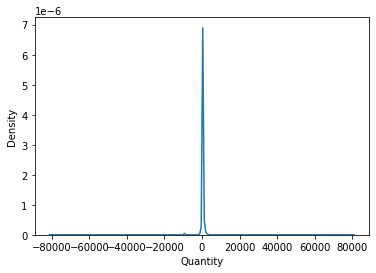

In [20]:
sns.kdeplot(df['Quantity'])

In [ ]:
# # Univariate analysis - Quantity
# plt.figure(figsize=(10, 8))
# sns.histplot(df['Quantity'], kde=True)
# plt.title('Distribution of Quantity')
# plt.xlabel('Quantity')
# plt.ylabel('Frequency')
# plt.show()


In [22]:
# # Categorical analysis - Country
# plt.figure(figsize=(10, 6))
# sns.countplot(data=df, x='Country')
# plt.title('Distribution of Orders by Country')
# plt.xlabel('Country')
# plt.ylabel('Number of Orders')
# plt.xticks(rotation=90)
# plt.show()


In [24]:
# group_country = df.groupby('Country')['Quantity'].sum().reset_index()

# # Convert the 'Quantity' column to float type
# group_country['Quantity'] = group_country['Quantity'].astype(float)

# plt.figure(figsize=(8, 6))
# sns.barplot(x='Country', y='Quantity', data=group_country)
# plt.title('Total Quantity by Country')
# plt.xticks(rotation=45)
# plt.show()

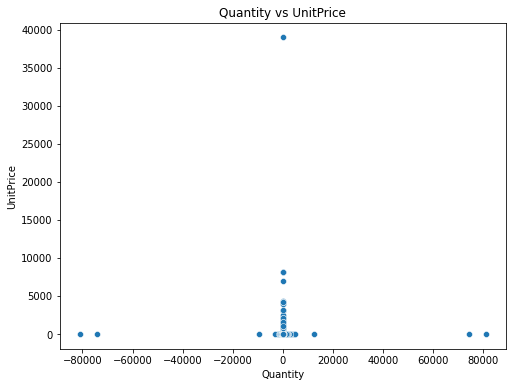

In [25]:
# Bivariate analysis - Quantity vs UnitPrice
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Quantity', y='UnitPrice')
plt.title('Quantity vs UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()


In [26]:
df[df['Quantity']==0].nunique()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [24]:
df['Quantity'].sort_values().head(10)

540422   -80995
61624    -74215
4287      -9360
160145    -3114
160144    -2000
160143    -1930
224419    -1515
187609    -1350
160142    -1300
390548    -1296
Name: Quantity, dtype: int64

In [25]:
df['Quantity'].sort_values().tail(10)

433788     3000
52711      3114
160546     3114
270885     3186
97432      3906
206121     4300
421632     4800
502122    12540
61619     74215
540421    80995
Name: Quantity, dtype: int64

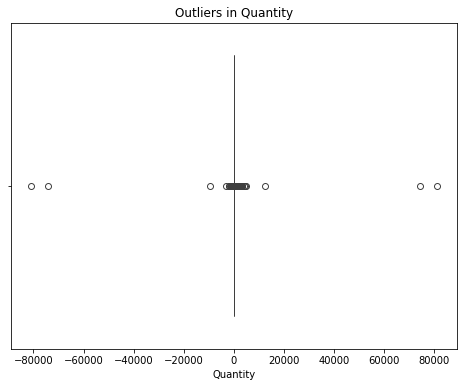

In [30]:
# Outlier Detection
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Quantity')
plt.title('Outliers in Quantity')
plt.show()

In [31]:
# Date/Time Analysis
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

In [32]:
df['YearMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [33]:
df['DayOfWeek'].value_counts(normalize=True)

DayOfWeek
Thursday     0.202478
Wednesday    0.173535
Tuesday      0.167417
Monday       0.163169
Sunday       0.155439
Friday       0.137962
Name: proportion, dtype: float64

In [34]:
df['Year'].value_counts(normalize=True)

Year
2011    0.934002
2010    0.065998
Name: proportion, dtype: float64

In [35]:
df['Sales']= df['Quantity']*df['UnitPrice']

In [36]:
sales_by_month = df.groupby('YearMonth').agg({'Sales':'sum'}).reset_index()

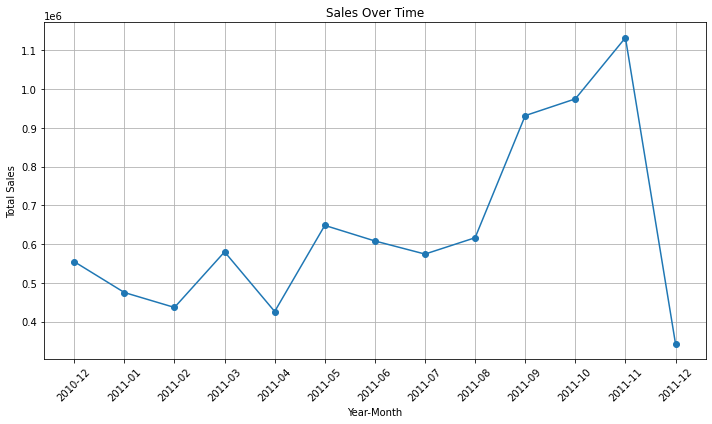

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month['YearMonth'], sales_by_month['Sales'], marker='o', linestyle='-')
plt.title('Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

Few initial observations from the data

1) Almost 90-95% of the sales is happening from UK.

2) There are customers who are buying in bulk from the website stating they might be wholesailers.

3) CustomerID is missing for 25% of the data

4) Most of sales data is from 2011(92%) and the rest is from 2010(8%)

5) Saturday there is no sales, suggesting the store would be closed

6) There are outliers in quantity at both tail ends, also -ve quantity suggesting there is a provision of return back to the store.


7) Sales has an upward trend, exception being most recent december month as data has only 9 days of records which is inconclusive of entire month sales.


## Cohort Analysis

In [75]:
ss = df.groupby('CustomerID').agg({'YearMonth':'min'}).reset_index()
ss.groupby('YearMonth').agg({'CustomerID':'count'}).reset_index()

,YearMonth,CustomerID
0,2010-12,948
1,2011-01,421
2,2011-02,380
3,2011-03,440
4,2011-04,299
5,2011-05,279
6,2011-06,235
7,2011-07,191
8,2011-08,167
9,2011-09,298


In [76]:
df.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,...,Recency,Monetary,Frequency,canc_order,No. of cancelled orders,Actual_Frequency,AOV,UniqueProducts,Average_Purchase_Time,UK_Flag
381295,579001,17003,BROCADE RING PURSE,36,2011-11-27 16:19:00,0.39,15555.0,United Kingdom,2011,11,...,11,4758.20,925,0,26,899,5.292770,404,0.409344,1
194959,560807,22950,36 DOILIES VINTAGE CHRISTMAS,12,2011-07-21 10:44:00,1.45,18143.0,United Kingdom,2011,7,...,116,1000.16,61,0,0,61,16.396066,59,2.311475,1
56112,543746,22727,ALARM CLOCK BAKELIKE RED,8,2011-02-11 13:50:00,3.75,17675.0,United Kingdom,2011,2,...,0,20098.10,721,0,16,705,28.507943,240,0.519149,1


In [77]:
sub = df[['CustomerID', 'InvoiceNo', 'InvoiceDate','YearMonth']].drop_duplicates()

In [78]:
cohort = sub.groupby(['CustomerID']).agg({'YearMonth':'min'}).reset_index().rename(columns = {'YearMonth':'Cohort'})

In [79]:
sub_cohort = sub.merge(cohort,how='left',left_on = ['CustomerID'],right_on = ['CustomerID'])

In [80]:
sub_cohort['YearMonth'] = pd.to_datetime(sub_cohort['YearMonth'])
sub_cohort['Cohort'] = pd.to_datetime(sub_cohort['Cohort'])

# Calculate the difference in months
sub_cohort['MonthDifference'] = (sub_cohort['YearMonth'].dt.year - sub_cohort['Cohort'].dt.year) * 12 + \
                        (sub_cohort['YearMonth'].dt.month - sub_cohort['Cohort'].dt.month)


In [81]:
sub_cohort.sample(3)

,CustomerID,InvoiceNo,InvoiceDate,YearMonth,Cohort,MonthDifference
10224,14408.0,557620,2011-06-21 13:58:00,2011-06-01,2011-03-01,3
3302,13590.0,543534,2011-02-09 13:25:00,2011-02-01,2011-02-01,0
5615,16712.0,548198,2011-03-29 16:05:00,2011-03-01,2011-03-01,0


In [82]:
sub_cohort_gg = sub_cohort[['CustomerID','Cohort','MonthDifference']].drop_duplicates()

In [83]:
reten = sub_cohort_gg.pivot_table(index='Cohort', columns='MonthDifference', values='CustomerID', aggfunc='count').reset_index()

In [84]:
reten[0]

0     948.0
1     421.0
2     380.0
3     440.0
4     299.0
5     279.0
6     235.0
7     191.0
8     167.0
9     298.0
10    352.0
11    321.0
12     41.0
Name: 0, dtype: float64

In [85]:
for i in reten.columns:
    if (i=='Cohort')|(i==0):
        pass
    else:
        
        reten[i] = np.round((reten[i]*100)/reten[0],2)
reten

MonthDifference,Cohort,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2010-12-01,948.0,38.19,33.44,38.71,35.97,39.66,37.97,35.44,35.44,39.45,37.34,50.00,27.43
1,2011-01-01,421.0,23.99,28.27,24.23,32.78,29.93,26.13,25.65,31.12,34.68,36.82,14.96,NaN
2,2011-02-01,380.0,24.74,19.21,27.89,26.84,24.74,25.53,28.16,25.79,31.32,9.21,NaN,NaN
3,2011-03-01,440.0,19.09,25.45,21.82,23.18,17.73,26.36,23.86,28.86,8.86,NaN,NaN,NaN
4,2011-04-01,299.0,22.74,22.07,21.07,20.74,23.75,23.08,26.09,8.36,NaN,NaN,NaN,NaN
5,2011-05-01,279.0,23.66,17.20,17.20,21.51,24.37,26.52,10.39,NaN,NaN,NaN,NaN,NaN
6,2011-06-01,235.0,20.85,18.72,27.23,24.68,33.62,10.21,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-07-01,191.0,20.94,20.42,23.04,27.23,11.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-08-01,167.0,25.15,25.15,25.15,13.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-09-01,298.0,29.87,32.55,12.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Feature Engineering

1) RFM Features - Recency, Tenure, Frequency, Monetary

2) Product Diversity - No. of Products Purchased 

3) Behavioural Features -Average Days Between Purchases, Favorite Day for Shopping

4) Georgraphical Features - Is from UK or not

5) Cancellation Features - Cancelled Flag, No. of cancelled orders

In [39]:
df['days_since_purchase'] = (df['InvoiceDate'].max() - df['InvoiceDate']).dt.days


In [40]:
Customer_age = df.groupby(['CustomerID']).agg({'days_since_purchase': 'max'}).reset_index().rename(columns={'days_since_purchase':'Customer_Age_within_store'})


In [41]:
Most_frequent_transcation = df.groupby(['CustomerID']).agg({'days_since_purchase': 'min'}).reset_index().rename(columns={'days_since_purchase':'Recency'})


In [42]:
Net_sales_customer = df.groupby(['CustomerID']).agg({'Sales': 'sum'}).reset_index().rename(columns={'Sales':'Monetary'})


In [43]:
Frequency = df.groupby(['CustomerID']).agg({'InvoiceNo': 'count'}).reset_index().rename(columns={'InvoiceNo':'Frequency'})


In [44]:
df = df.merge(Customer_age,how='left',on = ['CustomerID']).merge(Most_frequent_transcation,how='left',on = ['CustomerID']).merge(Net_sales_customer,how='left',on = ['CustomerID']).merge(Frequency,how='left',on = ['CustomerID'])

In [45]:
cancelled_orders = lambda x: 1 if x < 0 else 0
df['canc_order'] = df['Quantity'].apply(cancelled_orders)

In [46]:
cancelled_order = df.groupby(['CustomerID']).agg({'canc_order': 'sum'}).reset_index().rename(columns={'canc_order':'No. of cancelled orders'})


In [47]:
df = df.merge(cancelled_order,how='left',on = ['CustomerID'])

In [48]:
df.shape

(406829, 21)

In [49]:
df['canc_order'].sum()/df['canc_order'].count()

0.021888803403887137

In [50]:
df['canc_order'].count()

406829

In [51]:
#df[df['No. of cancelled orders']=='C536379']

In [52]:
# sns.kdeplot(data=df, x='No. of cancelled orders', shade=True)
# plt.xlabel('Cancelled Orders')
# plt.ylabel('Density')
# plt.title('Density Plot of Cancelled Orders')
# plt.xticks([0, 1], ['Non-cancelled', 'Cancelled'])
# plt.show()


In [53]:
df['Actual_Frequency'] = df['Frequency'] - df['No. of cancelled orders']

In [54]:
df['AOV'] = df['Monetary']/df['Actual_Frequency']

In [55]:
#df[df['CustomerID']==14056.0]

In [56]:
df['AOV'].describe()

count    4.068290e+05
mean             -inf
std               NaN
min              -inf
25%      6.881761e+00
50%      1.493914e+01
75%      2.129471e+01
max      3.861000e+03
Name: AOV, dtype: float64

In [57]:
df['CustomerID'].nunique()

4372

In [58]:
df['StockCode'].nunique()

3684

In [59]:
df['InvoiceNo'].nunique()

22190

In [60]:
df[(df['CustomerID'] == 12346)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,...,Sales,days_since_purchase,Customer_Age_within_store,Recency,Monetary,Frequency,canc_order,No. of cancelled orders,Actual_Frequency,AOV
38120,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,...,77183.6,325,325,325,0.0,2,0,1,1,0.0
38125,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011,1,...,-77183.6,325,325,325,0.0,2,1,1,1,0.0


In [61]:
unique_products = df.groupby('CustomerID').agg({'StockCode':'nunique'}).reset_index().rename(columns={'StockCode':'UniqueProducts'})

In [62]:
df = df.merge(unique_products,how='left',on = ['CustomerID'])

In [63]:
df['Average_Purchase_Time'] = df['Customer_Age_within_store']/df['Actual_Frequency']

In [64]:
df['UK_Flag']  = np.where(df['Country'] == 'United Kingdom',1,0)

In [65]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month', 'Day',
       'DayOfWeek', 'YearMonth', 'Sales', 'days_since_purchase',
       'Customer_Age_within_store', 'Recency', 'Monetary', 'Frequency',
       'canc_order', 'No. of cancelled orders', 'Actual_Frequency', 'AOV',
       'UniqueProducts', 'Average_Purchase_Time', 'UK_Flag'],
      dtype='object')

In [66]:
df.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,...,Recency,Monetary,Frequency,canc_order,No. of cancelled orders,Actual_Frequency,AOV,UniqueProducts,Average_Purchase_Time,UK_Flag
299471,571475,21914,BLUE HARMONICA IN BOX,2,2011-10-17 14:42:00,1.25,15033.0,United Kingdom,2011,10,...,4,2571.02,513,0,3,510,5.041216,315,0.643137,1
66633,544939,85049G,CHOCOLATE BOX RIBBONS,12,2011-02-25 10:10:00,1.25,17034.0,United Kingdom,2011,2,...,15,734.57,32,0,2,30,24.485667,28,9.566667,1
51705,543126,21974,SET OF 36 PAISLEY FLOWER DOILIES,1,2011-02-03 14:41:00,1.45,13581.0,United Kingdom,2011,2,...,308,118.00,10,0,0,10,11.800000,10,30.800000,1


In [67]:
df_sub = df[['CustomerID','Customer_Age_within_store', 'Recency', 'Monetary', 'Frequency','No. of cancelled orders','Actual_Frequency','AOV',
       'UniqueProducts', 'Average_Purchase_Time', 'UK_Flag']]

In [68]:
df_sub.shape

(406829, 11)

In [69]:
df_sub = df_sub.drop_duplicates()

In [70]:
df_sub.shape

(4372, 11)

In [71]:
df_sub['CustomerID'].value_counts()

CustomerID
17850.0    1
16050.0    1
14820.0    1
13568.0    1
12450.0    1
          ..
17105.0    1
14438.0    1
12956.0    1
15781.0    1
12713.0    1
Name: count, Length: 4372, dtype: int64

In [73]:
## Features Made, Tenure, Recency, Frequency, Monetary, AOV, Cancelled Orders Flag, No. of cancelled orders, Unique Products brought,  Day Preferred,Average 

## Correlation

In [86]:
df_sub.sample(3)

,CustomerID,Customer_Age_within_store,Recency,Monetary,Frequency,No. of cancelled orders,Actual_Frequency,AOV,UniqueProducts,Average_Purchase_Time,UK_Flag
76161,14507.0,275,23,1368.18,98,2,96,14.251875,79,2.864583,1
10069,14733.0,367,8,9451.54,216,14,202,46.789802,102,1.816832,1
350091,14904.0,25,1,1025.44,69,0,69,14.861449,66,0.362319,1


In [87]:
df_sub.corr()

,CustomerID,Customer_Age_within_store,Recency,Monetary,Frequency,No. of cancelled orders,Actual_Frequency,AOV,UniqueProducts,Average_Purchase_Time,UK_Flag
CustomerID,1.000000,0.000660,0.013687,-0.012563,-0.002786,-0.049632,-0.001243,0.013840,-0.008098,0.034696,0.466062
Customer_Age_within_store,0.000660,1.000000,0.271781,0.151877,0.192581,0.185684,0.190325,0.005431,0.250212,0.137589,0.003982
Recency,0.013687,0.271781,1.000000,-0.132001,-0.206980,-0.142514,-0.206392,0.018535,-0.302662,0.409731,-0.008034
Monetary,-0.012563,0.151877,-0.132001,1.000000,0.446622,0.381185,0.442981,0.148840,0.412015,-0.062654,-0.068897
Frequency,-0.002786,0.192581,-0.206980,0.446622,1.000000,0.610317,0.999675,-0.039546,0.877638,-0.124257,-0.018935
No. of cancelled orders,-0.049632,0.185684,-0.142514,0.381185,0.610317,1.000000,0.589921,0.001191,0.505114,-0.067779,-0.054079
Actual_Frequency,-0.001243,0.190325,-0.206392,0.442981,0.999675,0.589921,1.000000,-0.040350,0.878335,-0.124481,-0.017560
AOV,0.013840,0.005431,0.018535,0.148840,-0.039546,0.001191,-0.040350,1.000000,-0.084866,0.220210,-0.003600
UniqueProducts,-0.008098,0.250212,-0.302662,0.412015,0.877638,0.505114,0.878335,-0.084866,1.000000,-0.211644,-0.027022
Average_Purchase_Time,0.034696,0.137589,0.409731,-0.062654,-0.124257,-0.067779,-0.124481,0.220210,-0.211644,1.000000,0.040933


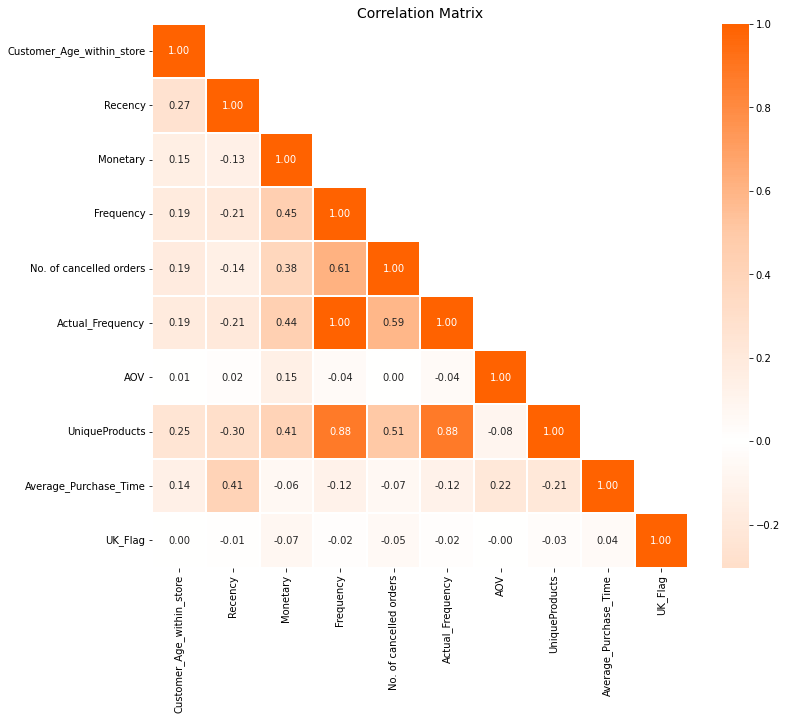

In [89]:
# Calculate the correlation matrix excluding the 'CustomerID' column
from matplotlib.colors import LinearSegmentedColormap

corr = df_sub.drop(columns=['CustomerID']).corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()


## Customer Segmentation

In [102]:
df_sub.sample(3)

,CustomerID,Customer_Age_within_store,Recency,Monetary,Frequency,No. of cancelled orders,Actual_Frequency,AOV,UniqueProducts,Average_Purchase_Time,UK_Flag
54754,17537.0,302,29,897.62,75,0,75,11.968267,74,4.026667,1
189163,17948.0,146,146,358.56,1,0,1,358.560000,1,146.000000,1
111297,13692.0,235,24,1466.87,55,2,53,27.676792,49,4.433962,1


C:\Users\nahar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


           Recency       Monetary    Frequency
Cluster                                       
1        25.660422    5686.229253   286.344262
2         9.750000  139291.095000  2113.000000
3         5.538462   57077.793077  1733.923077
4        99.460885     811.611197    59.876994
5        12.100000   22075.540250   459.175000
6         0.500000  267963.755000  1259.000000


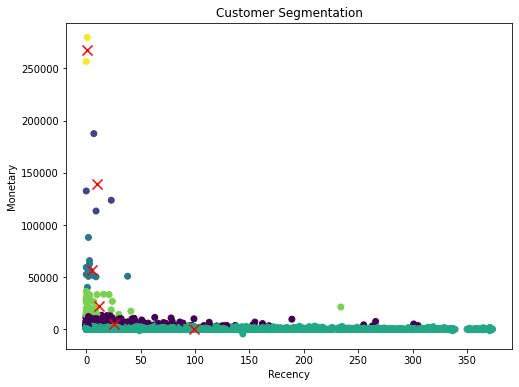

In [106]:
X = df_sub[['Recency', 'Monetary', 'Frequency']]

# Instantiate the K-Means model
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Add cluster assignments to the original dataframe
df_sub['Cluster'] = kmeans.labels_

# Calculate the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Recency', 'Monetary', 'Frequency'])
cluster_centers.index = cluster_centers.index + 1
cluster_centers.index.name = 'Cluster'
print(cluster_centers)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['Recency'], X['Monetary'], c=df_sub['Cluster'], cmap='viridis')
plt.scatter(cluster_centers['Recency'], cluster_centers['Monetary'], c='r', marker='x', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()


In [107]:
def get_rfm_scores(dataframe) -> pd.core.frame.DataFrame:
    df_ = dataframe.copy()
    df_["Recency_Score"] = pd.qcut(df_["Recency"], 5, labels=[5, 4, 3, 2, 1])
    df_["Frequency_Score"] = pd.qcut(
        df_["Actual_Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]
    )
    df_["Monetary_Score"] = pd.qcut(df_["Monetary"], 5, labels=[1, 2, 3, 4, 5])
    df_["RFM_SCORE"] = (
        df_["Recency_Score"].astype(str)
        + df_["Frequency_Score"].astype(str)
        + df_["Monetary_Score"].astype(str)
    )

    return df_

# Apply the function to your dataframe
rfm = get_rfm_scores(df_sub)

In [112]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map,regex = True)

,CustomerID,Customer_Age_within_store,Recency,Monetary,Frequency,No. of cancelled orders,Actual_Frequency,AOV,UniqueProducts,Average_Purchase_Time,UK_Flag,Cluster,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,segment
0,17850.0,373,301,5288.63,312,15,297,17.806835,24,1.255892,1,0,1,5,5,155,cant_loose5
9,13047.0,373,31,3079.10,196,24,172,17.901744,106,2.168605,1,3,4,5,5,455,loyal_customers5
26,12583.0,373,2,7187.34,251,4,247,29.098543,115,1.510121,0,0,5,5,5,555,champions5
46,13748.0,373,95,948.25,28,0,28,33.866071,24,13.321429,1,3,2,2,4,224,hibernating4
65,15100.0,373,329,635.10,6,3,3,211.700000,1,124.333333,1,3,1,1,3,113,hibernating3


In [114]:
rfm['segment'] = rfm['segment'].str.replace(r'\d+', '', regex=True)

In [117]:
rfm.sample(3)


,CustomerID,Customer_Age_within_store,Recency,Monetary,Frequency,No. of cancelled orders,Actual_Frequency,AOV,UniqueProducts,Average_Purchase_Time,UK_Flag,Cluster,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,segment
8897,14487.0,367,26,1183.58,145,1,144,8.219306,112,2.548611,1,3,4,5,4,454,loyal_customers
10288,13488.0,366,16,8910.61,427,5,422,21.115190,272,0.867299,1,0,4,5,5,455,loyal_customers
212884,16053.0,121,32,1511.95,84,0,84,17.999405,81,1.440476,1,3,3,4,4,344,loyal_customers


In [121]:
rfm[['Recency','Monetary','Frequency','segment']]\
.groupby('segment')\
.agg({'mean','std','max','min'})


Recency                          Monetary  \
                           mean min         std  max         mean   
segment                                                             
about_to_sleep        29.735294   0   19.658279   70   283.796544   
at_Risk              132.923490   0   91.986373  373   935.733034   
cant_loose           123.102041   2   77.821828  337  2658.603582   
champions              3.968170   0    3.273694   10  9637.844562   
hibernating          154.776718   0  112.119266  373   325.686795   
loyal_customers       25.627928   0   17.334749   70  2598.141279   
need_attention        33.496454   0   20.924750   70   863.013656   
potential_loyalists    4.260000   0    2.827056   10   613.027400   
promising              5.500000   2    4.949747    9   200.070000   

                                                             Frequency       \
                              min           std        max        mean  min   
segment                                                                       
about_to_sleep       9.797000e+01    105.302333     463.46   41.661765   29   
at_Risk              6.423000e+01    900.500131   11056.93   48.902013    2   
cant_loose           4.115300e+02   2038.409822   12393.70  157.806122    1   
champions            9.336200e+02  25060.393356  279489.02  408.161804  121   
hibernating         -4.287630e+03    707.405036   21535.90   13.645038    1   
loyal_customers      3.552714e-15   5085.172073  123725.45  141.002703   29   
need_attention       4.769600e+02    796.717496   11581.80   41.946809   29   
potential_loyalists  2.497200e+02    188.324819     902.22  109.060000   59   
promising            1.816700e+02     26.021530     218.47   72.000000   70   

                                       
                            std   max  
segment                                
about_to_sleep         9.182286    58  
at_Risk               26.093912   135  
cant_loose            90.058247   548  
champions            664.728926  7983  
hibernating            8.131084    40  
loyal_customers      118.967829  1212  
need_attention         8.561314    76  
potential_loyalists   41.678757   203  
promising              2.828427    74

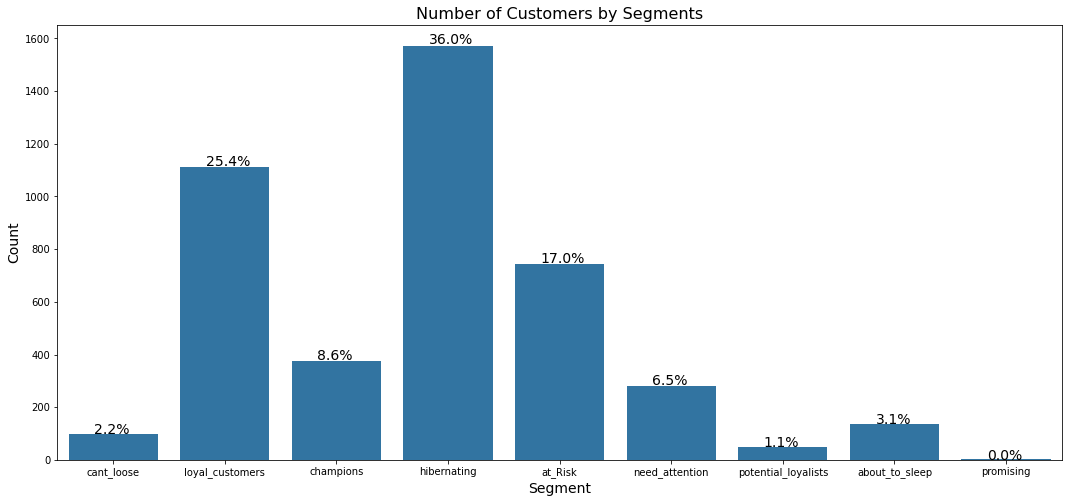

In [123]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm,
                   x = 'segment')
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()


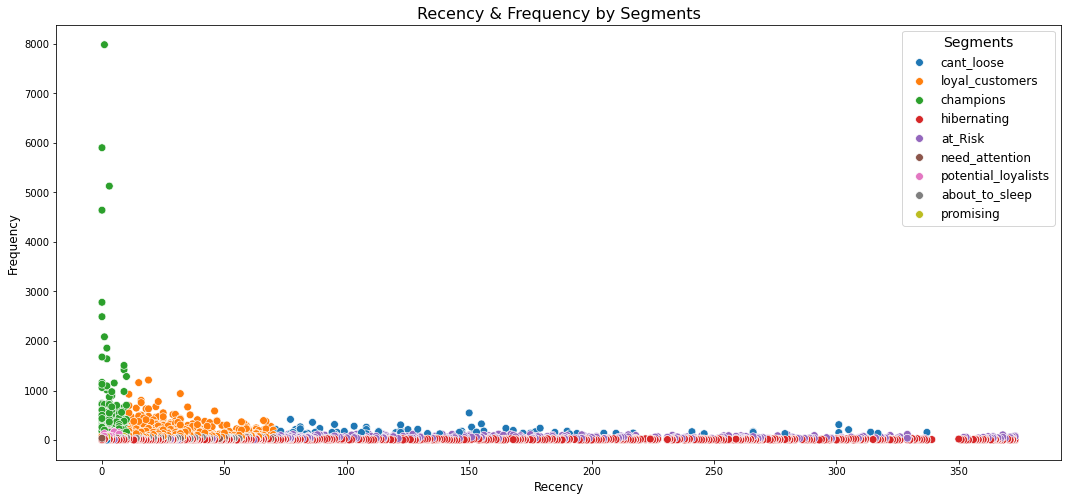

In [126]:
plt.figure(figsize=(18, 8))
sns.scatterplot(
    data=rfm, x="Recency", y="Frequency", hue="segment", s=60
)
plt.title("Recency & Frequency by Segments", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Segments", title_fontsize=14)
plt.show()

<ipython-input-128-5cc23b53dd58>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
<ipython-input-128-5cc23b53dd58>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
<ipython-input-128-5cc23b53dd58>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)


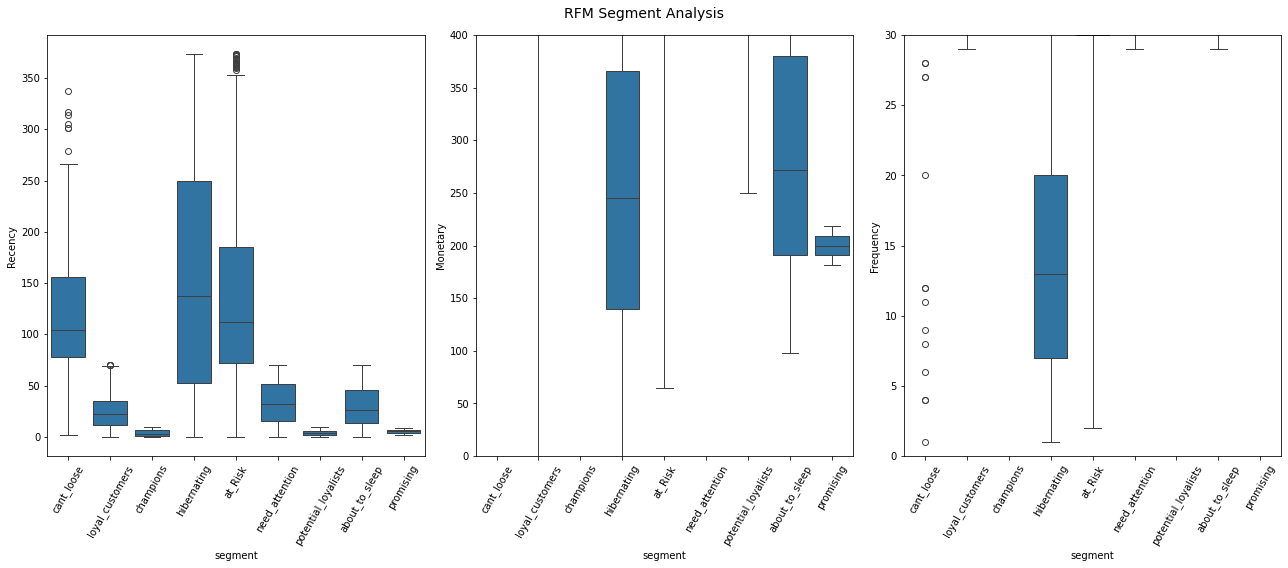

In [128]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("RFM Segment Analysis", size=14)
feature_list = ["Recency", "Monetary", "Frequency"]
for idx, col in enumerate(feature_list):
    sns.boxplot(
        ax=axes[idx], data=rfm, x="segment", y=feature_list[idx]
    )
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    if idx == 1:
        axes[idx].set_ylim([0, 400])
    if idx == 2:
        axes[idx].set_ylim([0, 30])
plt.tight_layout()
plt.show()